# Импорты

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine, text

In [161]:
RANDOM_STATE = 190224

# Загрузка и анализ данных

## Загрузка данных

In [162]:
db_config = {
'user': 'praktikum_student',# имя пользователя
'pwd': 'Sdf4$2;d-d30pp',# пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432,# порт подключения
'db': 'data-science-final'# название базы данных,
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [163]:
engine = create_engine(connection_string)
del db_config
del connection_string

In [164]:
data_arc = None
data_bulk = None
data_bulk_time = None
data_gas = None
data_temp = None
data_wire = None
data_wire_time = None

TABLES = [data_arc,
          data_bulk,
          data_bulk_time,
          data_gas,
          data_temp,
          data_wire,
          data_wire_time]

DB_TABLES = ['steel.data_arc',
             'steel.data_bulk',
             'steel.data_bulk_time',
             'steel.data_gas',
             'steel.data_temp',
             'steel.data_wire',
             'steel.data_wire_time']

for i, table in enumerate(TABLES):
    query = f'''
        SELECT *
        FROM {DB_TABLES[i]};
        '''

    TABLES[i] = pd.read_sql_query(query, engine)

data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time = TABLES


## Данные об электродах

Таблица steel.data_arc
* key — номер партии;
* BeginHeat — время начала нагрева;
* EndHeat — время окончания нагрева;
* ActivePower — значение активной мощности;
* ReactivePower — значение реактивной мощности.

In [165]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            14876 non-null  int64  
 1   BeginHeat      14876 non-null  object 
 2   EndHeat        14876 non-null  object 
 3   ActivePower    14876 non-null  float64
 4   ReactivePower  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [166]:
data_arc.describe()

,key,ActivePower,ReactivePower
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


In [167]:
data_arc.sample(5)

,key,BeginHeat,EndHeat,ActivePower,ReactivePower
5801,1261,22:38:10,22:41:18,0.847888,0.578758
4838,1044,14:28:43,14:33:14,1.285266,0.797215
4612,995,21:18:43,21:20:45,0.420650,0.316871
5895,1284,16:40:55,16:41:28,0.139868,0.085432
5603,1217,08:57:05,08:59:13,0.505261,0.334837


In [168]:
data_arc['BeginHeat'] = pd.to_datetime(data_arc['BeginHeat'], format='%H:%M:%S').dt.time
data_arc['EndHeat'] = pd.to_datetime(data_arc['EndHeat'], format='%H:%M:%S').dt.time

In [169]:
data_arc.duplicated().sum()

0

## Данные об объёме сыпучих материалов

Таблица steel.data_bulk
* key — номер партии;
* Bulk1 … Bulk15 — объём подаваемого материала.

In [170]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [171]:
data_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [172]:
data_bulk.sample(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
294,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,154.0,153.0
1196,1245,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN
2246,2327,NaN,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,110.0,204.0
2671,2772,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,62.0,NaN,156.0,NaN,102.0,106.0
23,24,NaN,NaN,89.0,NaN,NaN,108.0,NaN,NaN,NaN,NaN,NaN,412.0,NaN,204.0,203.0


In [173]:
data_bulk['Bulk 1'].value_counts()

Bulk 1
27.0     75
46.0     30
48.0     16
44.0     16
31.0     14
28.0     11
54.0     10
34.0      6
29.0      6
26.0      5
22.0      5
30.0      5
38.0      5
62.0      3
52.0      3
73.0      3
39.0      2
37.0      2
50.0      2
92.0      2
36.0      2
16.0      2
24.0      2
43.0      2
32.0      1
19.0      1
104.0     1
69.0      1
74.0      1
118.0     1
47.0      1
78.0      1
21.0      1
67.0      1
63.0      1
51.0      1
58.0      1
83.0      1
33.0      1
60.0      1
65.0      1
90.0      1
75.0      1
94.0      1
185.0     1
10.0      1
41.0      1
Name: count, dtype: int64

In [174]:
data_bulk = data_bulk.fillna(0)
data_bulk = data_bulk.astype(int)

In [175]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   key      3129 non-null   int64
 1   Bulk 1   3129 non-null   int64
 2   Bulk 2   3129 non-null   int64
 3   Bulk 3   3129 non-null   int64
 4   Bulk 4   3129 non-null   int64
 5   Bulk 5   3129 non-null   int64
 6   Bulk 6   3129 non-null   int64
 7   Bulk 7   3129 non-null   int64
 8   Bulk 8   3129 non-null   int64
 9   Bulk 9   3129 non-null   int64
 10  Bulk 10  3129 non-null   int64
 11  Bulk 11  3129 non-null   int64
 12  Bulk 12  3129 non-null   int64
 13  Bulk 13  3129 non-null   int64
 14  Bulk 14  3129 non-null   int64
 15  Bulk 15  3129 non-null   int64
dtypes: int64(16)
memory usage: 391.2 KB


In [176]:
data_bulk.duplicated().sum()

0

## Данные о времени подачи сыпучих материалов

Таблица steel.data_bulk_time
* key — номер партии;
* Bulk1 … Bulk15 — время подачи материала.

In [177]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [178]:
data_bulk_time.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [179]:
data_bulk_time.sample(5)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
819,851,None,None,None,00:20:14,None,None,None,None,None,None,None,00:12:40,None,00:12:40,00:12:40
367,392,None,None,None,03:08:46,None,None,None,None,None,None,None,03:03:35,None,03:03:35,03:03:35
1150,1196,16:02:39,None,16:18:52,16:18:52,None,None,None,None,None,None,None,15:57:36,None,15:57:36,15:57:36
930,970,None,None,None,None,None,None,None,None,None,None,None,01:40:39,None,01:40:39,01:40:39
644,672,None,None,None,04:38:42,None,None,None,None,None,None,None,04:32:14,None,04:32:14,04:32:14


In [180]:
data_bulk_time = data_bulk_time.fillna('00:00:00')
for i in range(1,16):
    data_bulk_time[f"Bulk {i}"] = pd.to_datetime(data_bulk_time[f"Bulk {i}"], format='%H:%M:%S').dt.time

In [181]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   3129 non-null   object
 2   Bulk 2   3129 non-null   object
 3   Bulk 3   3129 non-null   object
 4   Bulk 4   3129 non-null   object
 5   Bulk 5   3129 non-null   object
 6   Bulk 6   3129 non-null   object
 7   Bulk 7   3129 non-null   object
 8   Bulk 8   3129 non-null   object
 9   Bulk 9   3129 non-null   object
 10  Bulk 10  3129 non-null   object
 11  Bulk 11  3129 non-null   object
 12  Bulk 12  3129 non-null   object
 13  Bulk 13  3129 non-null   object
 14  Bulk 14  3129 non-null   object
 15  Bulk 15  3129 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [182]:
data_bulk_time.duplicated().sum()

0

## Данные о продувке сплава газом

Таблица steel.data_gas
* key — номер партии;
* gas — объём подаваемого газа.

In [183]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [184]:
data_gas.describe()

,key,gas
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [185]:
data_gas.sample(5)

,key,gas
837,840,8.373110
665,668,10.562096
1854,1857,6.080227
1663,1666,21.026331
2807,2810,8.286403


In [186]:
data_gas.duplicated().sum()

0

## Данные об измерениях температуры

Таблица steel.data_temp
* key — номер партии;
* MesaureTime — время замера;
* Temperature — значение температуры.

In [187]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          15907 non-null  int64  
 1   MesaureTime  15907 non-null  object 
 2   Temperature  13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [188]:
data_temp.describe()

,key,Temperature
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


In [189]:
data_temp.sample(5)

,key,MesaureTime,Temperature
10263,2078,11:52:20,1588.0
1324,235,03:43:51,1593.0
1192,214,04:52:11,1619.0
15876,3236,22:25:38,NaN
5840,1186,09:21:23,1572.0


In [190]:
data_temp["MesaureTime"] = pd.to_datetime(data_temp["MesaureTime"], format='%H:%M:%S').dt.time

/Users/vs/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


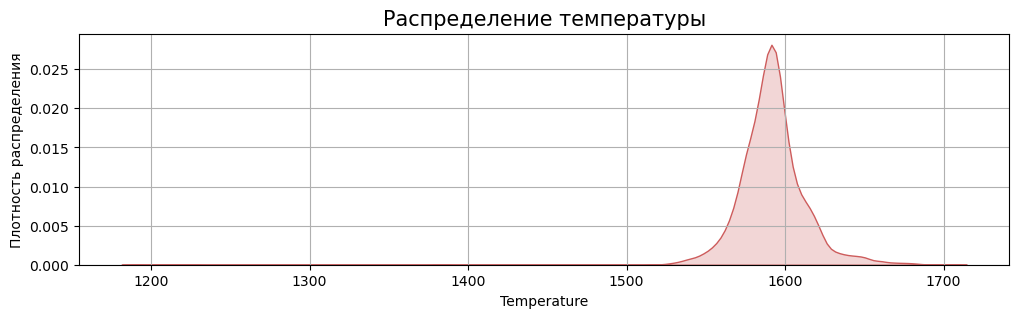

In [191]:
plt.figure(figsize=(12, 3))
sns.kdeplot(data_temp['Temperature'], color='indianred', legend=True, fill=True)
plt.xlabel('Temperature')
plt.ylabel('Плотность распределения')
plt.title('Распределение температуры', fontsize=15)
plt.grid();

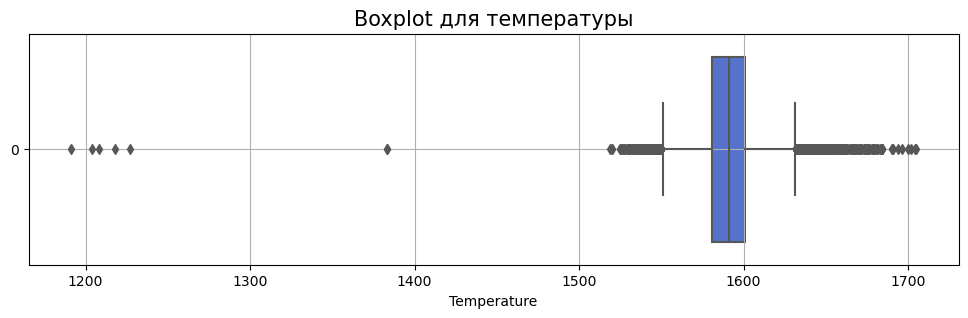

In [192]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=data_temp['Temperature'], orient='h', color='royalblue')
plt.xlabel('Temperature')
plt.title('Boxplot для температуры', fontsize=15)
plt.grid()

In [193]:
data_temp.duplicated().sum()

0

## Данные об объёме проволочных материалов

Таблица steel.data_wire
* key — номер партии;
* Wire1 … Wire15 — объём подаваемых проволочных материалов.

In [194]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [195]:
data_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [196]:
data_wire.sample(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
791,845,110.167198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1323,1394,159.634796,98.050155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,294,99.372001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,1092,220.147201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,297,158.296310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
data_wire = data_wire.fillna(0)

In [198]:
data_wire.duplicated().sum()

0

## Данные о времени подачи проволочных материалов

Таблица steel.data_wire_time
* key — номер партии;
* Wire1 … Wire15 — время подачи проволочных материалов.

In [199]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [200]:
data_wire_time.describe()

,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [201]:
data_wire_time.sample(5)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2214,2325,21:08:13,21:11:55,None,None,None,None,None,None,None
1031,1091,06:18:34,None,None,None,None,None,None,None,None
2296,2420,08:22:49,08:24:07,None,None,None,None,None,None,None
1174,1242,06:49:29,None,None,None,None,None,None,None,None
467,499,23:25:51,None,None,None,None,None,None,None,None


In [202]:
data_wire_time = data_wire_time.fillna('00:00:00')
for i in range(1,10):
    data_wire_time[f"Wire {i}"] = pd.to_datetime(data_wire_time[f"Wire {i}"], format='%H:%M:%S').dt.time

In [203]:
data_wire_time.duplicated().sum()

0